 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [523]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [524]:
# Reading whale returns
whale_data_path = Path("Resources/whale_returns.csv")
whale_data_df = pd.read_csv(whale_data_path, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
whale_data_df = whale_data_df.sort_index()
whale_data_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [525]:
columns = ["Soros", "Paulson", "Tiger", "Berkshire"]
whale_data_df.columns = columns

whale_data_df

,Soros,Paulson,Tiger,Berkshire
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [526]:
# Count nulls
whale_data_df.isnull().sum()

Soros        1
Paulson      1
Tiger        1
Berkshire    1
dtype: int64

In [527]:
# Drop nulls
whale_data_df.dropna(inplace=True)

In [528]:
whale_data_df.isnull().sum()

Soros        0
Paulson      0
Tiger        0
Berkshire    0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [529]:
# Reading algorithmic returns
algo_data_path = Path("Resources/algo_returns.csv")
algo_data_df = pd.read_csv(algo_data_path, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
algo_data_df = algo_data_df.sort_index()

In [530]:
# Count nulls
algo_data_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [531]:
# Drop nulls
algo_data_df.dropna(inplace=True)
algo_data_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [532]:
algo_data_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [533]:
# Reading S&P 500 Closing Prices
sp500_data_path = Path("Resources/sp500_history.csv") 
sp500_data_df = pd.read_csv(sp500_data_path, index_col = 'Date', parse_dates=True, infer_datetime_format=True)
sp500_data_df = sp500_data_df.sort_index()
sp500_data_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [534]:
# Check Data Types
sp500_data_df.dtypes

Close    object
dtype: object

In [535]:
# Fix Data Types
sp500_data_df['Close'] = sp500_data_df['Close'].str.replace('$', '')

sp500_data_df.dtypes


Close    object
dtype: object

In [536]:
sp500_data_df['Close'] = sp500_data_df['Close'].astype('float')
sp500_data_df.dtypes

Close    float64
dtype: object

In [537]:
# Calculate Daily Returns
sp_daily_returns = sp500_data_df.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [538]:
# Drop nulls
sp_daily_returns.isnull().sum()

Close    1
dtype: int64

In [539]:
sp_daily_returns.dropna(inplace=True)
sp_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [540]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily_returns = sp_daily_returns.rename(columns={"Close": "SP500_Returns"})
sp_daily_returns

,SP500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [541]:
whale_data_df.head()

,Soros,Paulson,Tiger,Berkshire
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [542]:
algo_data_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [543]:
sp_daily_returns.head()

,SP500_Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [544]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_data_df,algo_data_df,sp_daily_returns], axis='columns', join='inner')
combined_returns

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

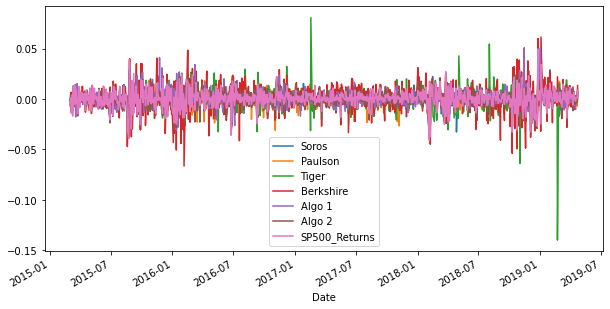

In [545]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [546]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928
...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

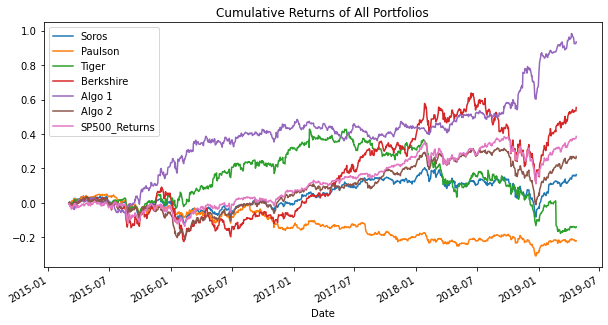

In [547]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of All Portfolios")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

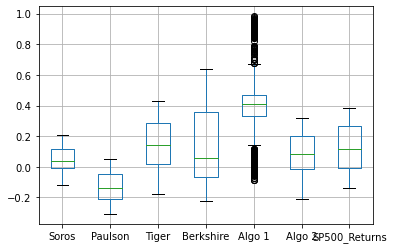

In [653]:
# Box plot to visually show risk
cumulative_returns.boxplot(column=['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2','SP500_Returns'])

### Calculate Standard Deviations

In [549]:
# Calculate the daily standard deviations of all portfolios
daily_std = cumulative_returns.std()
daily_std

Soros            0.073238
Paulson          0.088455
Tiger            0.149844
Berkshire        0.241575
Algo 1           0.232277
Algo 2           0.131700
SP500_Returns    0.144448
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [550]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp_daily_returns.std()
sp500_std

SP500_Returns    0.008111
dtype: float64

In [551]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

Berkshire        0.241575
Algo 1           0.232277
Tiger            0.149844
SP500_Returns    0.144448
Algo 2           0.131700
Paulson          0.088455
Soros            0.073238
dtype: float64

### Calculate the Annualized Standard Deviation

In [552]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

Berkshire        3.834878
Algo 1           3.687285
Tiger            2.378706
SP500_Returns    2.293036
Algo 2           2.090678
Paulson          1.404180
Soros            1.162620
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

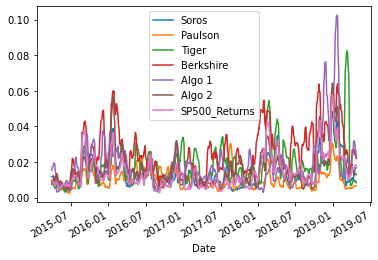

In [654]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

cumulative_returns.rolling(window=21).std().plot()





### Calculate and plot the correlation

<AxesSubplot:>

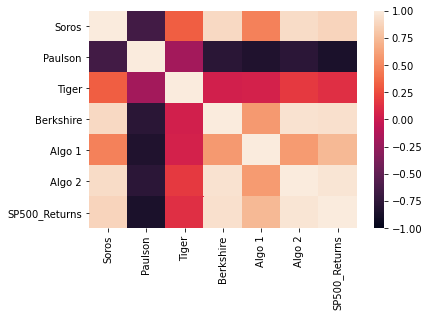

In [636]:
# Calculate the correlation
correlation = cumulative_returns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


## Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [655]:
# Calculate covariance of a single portfolio
covariance = cumulative_returns['Soros'].cov(cumulative_returns['SP500_Returns'])
covariance

0.009262121816538894

In [656]:
# Calculate variance of S&P 500
variance = cumulative_returns['SP500_Returns'].var()
variance

0.020865137941717914

In [657]:
# Computing beta
soros_beta = covariance / variance
soros_beta

0.44390417367048113

In [658]:
# Plot beta trend
rolling_covariance = cumulative_returns['Soros'].rolling(window=60).cov(cumulative_returns['SP500_Returns'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000858
2019-04-17    0.000807
2019-04-18    0.000754
2019-04-22    0.000701
2019-04-23    0.000684
Length: 1043, dtype: float64

In [659]:
rolling_variance = cumulative_returns['SP500_Returns'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.001233
2019-04-17    0.001191
2019-04-18    0.001150
2019-04-22    0.001107
2019-04-23    0.001104
Name: SP500_Returns, Length: 1043, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros'}, xlabel='Date'>

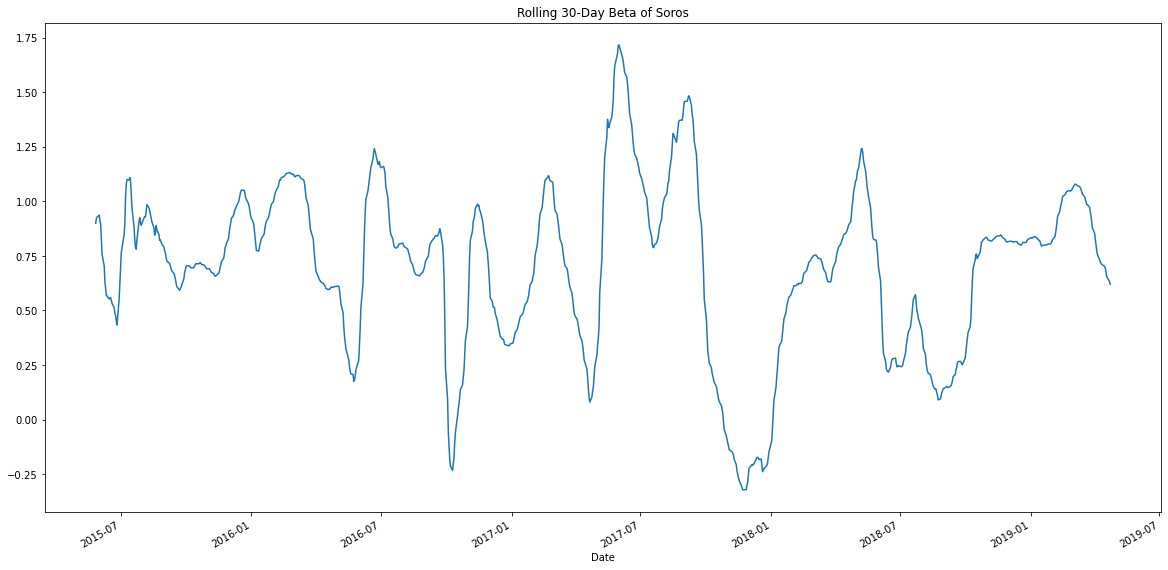

In [660]:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Soros')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

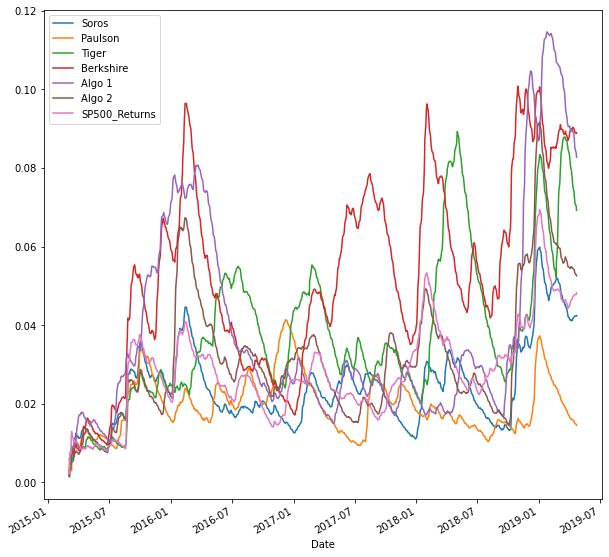

In [661]:
# Use `ewm` to calculate the rolling window
cumulative_returns.ewm(halflife=21).std().plot(figsize=(10,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [647]:
# Annualized Sharpe Ratios
sharpe_ratios = (cumulative_returns.mean() * 252) / (cumulative_returns.std() * np.sqrt(252))
sharpe_ratios

Soros            10.800652
Paulson         -22.246513
Tiger            15.675541
Berkshire        10.488981
Algo 1           26.584386
Algo 2           10.480419
SP500_Returns    13.578149
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

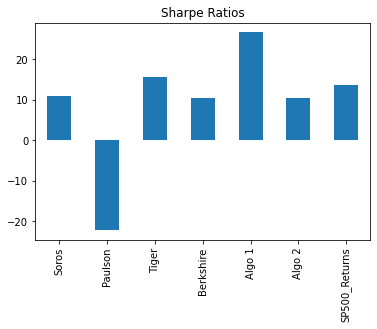

In [648]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [590]:
# Reading data from 1st stock
aapl_data_path = Path("Resources/aapl_historical.csv")
aapl_data_df = pd.read_csv(aapl_data_path, index_col = 'Trade DATE', parse_dates=True, infer_datetime_format=True)

In [591]:
# Reading data from 2nd stock
goog_data_path = Path("Resources/goog_historical.csv")
goog_data_df = pd.read_csv(goog_data_path, index_col = 'Trade DATE', parse_dates=True, infer_datetime_format=True)

In [592]:
# Reading data from 3rd stock
cost_data_path = Path("Resources/cost_historical.csv")
cost_data_df = pd.read_csv(cost_data_path, index_col = 'Trade DATE', parse_dates=True, infer_datetime_format=True)

In [593]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_data_df,goog_data_df,cost_data_df], axis='columns', join='inner')
combined_df

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62
...,...,...,...,...,...,...
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48


In [594]:
# Reset Date index

In [596]:
# Reorganize portfolio data by having a column per symbol
columns = ["delete", "AAPL", "delete", "GOOG", "delete", "COST"]
combined_df.columns = columns
combined_df.drop(columns=['delete'], inplace=True)
combined_df

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [597]:
# Calculate daily returns
combined_returns = combined_df.pct_change()
combined_returns

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-09,NaN,NaN,NaN
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
...,...,...,...
2018-05-17,0.003650,0.011469,0.003217
2018-05-16,0.006364,0.002948,-0.004459
2018-05-15,-0.009246,-0.002348,-0.016255


In [598]:
# Drop NAs
combined_returns.dropna(inplace=True)
combined_returns.isnull().sum()

AAPL    0
GOOG    0
COST    0
dtype: int64

In [599]:
# Display sample data
combined_returns.head()

,AAPL,GOOG,COST
Trade DATE,,,
2019-05-08,0.010861,0.003347,-0.008749
2019-05-07,-0.000197,0.006714,-0.004806
2019-05-06,0.027704,0.013023,0.016862
2019-05-03,0.015685,-0.003355,0.001597
2019-05-02,-0.012279,-0.019226,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [601]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = combined_returns.dot(weights)


# Display sample data
portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [606]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_df = pd.concat([combined_returns,portfolio_returns], axis='columns', join='inner')
portfolio_df = portfolio_df.rename(columns={0: "Portfolio"})

portfolio_df

,AAPL,GOOG,COST,Portfolio
Trade DATE,,,,
2019-05-08,0.010861,0.003347,-0.008749,0.001820
2019-05-07,-0.000197,0.006714,-0.004806,0.000570
2019-05-06,0.027704,0.013023,0.016862,0.019196
2019-05-03,0.015685,-0.003355,0.001597,0.004642
2019-05-02,-0.012279,-0.019226,-0.007890,-0.013131
...,...,...,...,...
2018-05-17,0.003650,0.011469,0.003217,0.006112
2018-05-16,0.006364,0.002948,-0.004459,0.001618
2018-05-15,-0.009246,-0.002348,-0.016255,-0.009283


In [607]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_df.dropna(inplace=True)
portfolio_df.isnull().sum()

AAPL         0
GOOG         0
COST         0
Portfolio    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [608]:
# Calculate the annualized `std`
annualized_std = portfolio_df * np.sqrt(252)
annualized_std

,AAPL,GOOG,COST,Portfolio
Trade DATE,,,,
2019-05-08,0.172411,0.053125,-0.138878,0.028886
2019-05-07,-0.003130,0.106577,-0.076301,0.009049
2019-05-06,0.439785,0.206730,0.267682,0.304732
2019-05-03,0.248991,-0.053254,0.025349,0.073696
2019-05-02,-0.194917,-0.305197,-0.125247,-0.208453
...,...,...,...,...
2018-05-17,0.057939,0.182063,0.051064,0.097022
2018-05-16,0.101025,0.046803,-0.070783,0.025682
2018-05-15,-0.146783,-0.037273,-0.258038,-0.147365


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

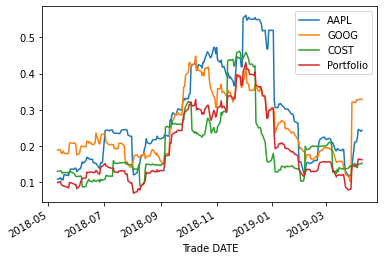

In [666]:
# Calculate rolling standard deviation

# Plot rolling standard deviation
annualized_std.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

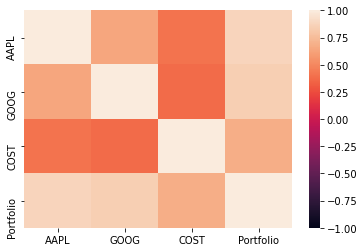

In [667]:
# Calculate and plot the correlation
port_correlation = portfolio_df.corr()

sns.heatmap(port_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [670]:
# Calculate and plot Beta
covariance = portfolio_df['Portfolio'].rolling(window=60).cov(sp_daily_returns['SP500_Returns'])
covariance

2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
2012-10-08   NaN
              ..
2019-05-02   NaN
2019-05-03   NaN
2019-05-06   NaN
2019-05-07   NaN
2019-05-08   NaN
Length: 1659, dtype: float64

In [671]:
variance = sp_daily_returns['SP500_Returns'].rolling(window=60).var()
variance

Date
2012-10-02         NaN
2012-10-03         NaN
2012-10-04         NaN
2012-10-05         NaN
2012-10-08         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: SP500_Returns, Length: 1648, dtype: float64

In [672]:
Port_beta = covariance / variance
Port_beta

2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
2012-10-08   NaN
              ..
2019-05-02   NaN
2019-05-03   NaN
2019-05-06   NaN
2019-05-07   NaN
2019-05-08   NaN
Length: 1659, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Portfolio'}>

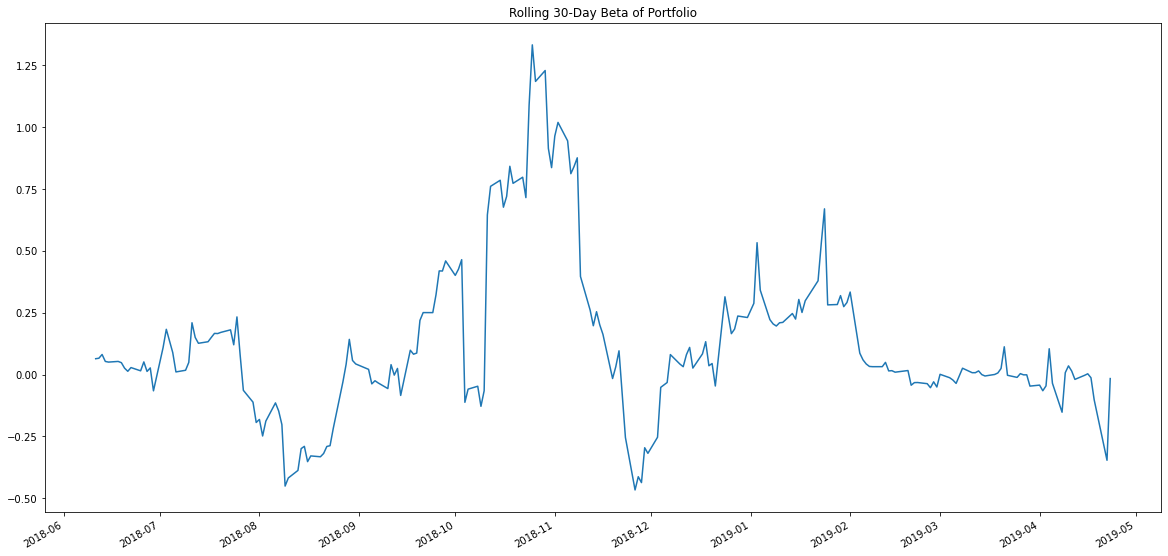

In [673]:
Port_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [675]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (portfolio_df.mean() * 252) / (portfolio_df.std() * np.sqrt(252))
sharpe_ratios

AAPL        -0.061751
GOOG        -0.084987
COST        -0.929405
Portfolio   -0.376153
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

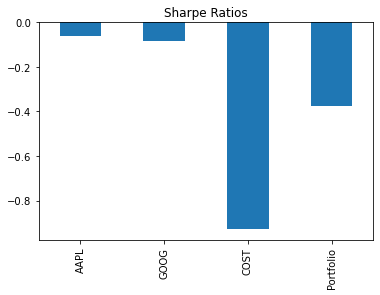

In [676]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [ ]:
better than costco I guess